In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
def tide_spl(t):
    return 1.0*t + 1

In [3]:
def dhdt_spl(t):
    return 1.0

In [4]:
def system(t, y, *args):
        
        # set initial values for concentration and elevation
        init_conc = y[0]
        init_elev = y[1]
        
        # use spline function for tide height to set current water_height
        water_height = tide_spl(t)
        depth = water_height - init_elev #calculate current depth

        # use derivative of tide spline to get current gradient and set H
        dhdt = dhdt_spl(t)

        if dhdt > 0:
            H = 1
        else:
            H = 0
        
        # Eq 1 - Concentration change
        delta_conc = - (settle_rate * init_conc) / depth - H / depth * (init_conc - bound_conc) * dhdt

        # Eq 2 - Elevation change (i.e. sediment accumulation)
        # step_size below is undefined. I only included it to show where I need it.
        delta_elev = settle_rate * (init_conc + delta_conc) / bulk_dens

        return [delta_conc, delta_elev]

In [5]:
# model parameters
bound_conc = 0.8
settle_rate = 0.0011
bulk_dens = 1100

# initial values for solver
elev = 0
conc = 1
t = np.linspace(0, 10, 1001)

# solve equations
sol = solve_ivp(system, [t[0], t[-1]], y0=[conc, elev], t_eval=t, args=(bound_conc, settle_rate, bulk_dens))

In [6]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 26
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.  ,  0.01,  0.02, ...,  9.98,  9.99, 10.  ])
 t_events: None
        y: array([[1.00000000e+00, 9.98008909e-01, 9.96056871e-01, ...,
        8.17367847e-01, 8.17351207e-01, 8.17334610e-01],
       [0.00000000e+00, 7.99892322e-09, 1.60171860e-08, ...,
        8.27287414e-06, 8.28103112e-06, 8.28918796e-06]])
 y_events: None

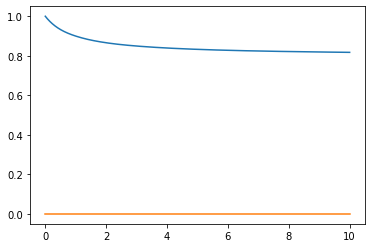

In [7]:
fig, axe = plt.subplots()
axe.plot(t, sol.y.T)